# Работа №8. Линейный регрессионный анализ
В линейный регрессионный анализ входит широкий круг задач, связанных с построением (восстановлением) зависимостей между группами числовых переменных
$$
X = (x_1, ..., x_p) \text{ и } Y = (y_1, ..., y_m).
$$
Предполагается, что $X$ - независимые переменные (факторы, объясняющие переменные) влияют на значения $Y$ - зависимых переменных (откликов, объясняемых переменных). По имеющимся эмпирическим данным $(X_i, Y_i), i=1,...,n$ требуется построить функцию $f(X)$, которая приближенно описывала бы изменение $Y$ при изменении $X$:
$$
Y \approx f(X).
$$
Предполагается, что множество допустимых функций, из которого подбирается $f(X)$, является парамтрическим:
$$
f(X) = f(X, \theta),
$$
где $\theta$ - неизвестный параметр (вообще говоря, многомерный). При построении $f(X)$ будем считать, что
$$
Y = f(X, \theta) + \varepsilon,
$$
где первое слагаемое - закономерное изменение $Y$ от $X$, а второе - $\varepsilon$ - случайная составляющая с нулевым средним; $f(X, \theta)$ является условным математическим ожидание $Y$ при условии известного $X$ и называется **регерссией $Y$ по $X$**. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from scipy.optimize import minimize

### 1. Простая линейная регрессия
Пусть $X$ и $Y$ одномерные величины; обозначим их $x$ и $y$, а функция $f(x, \theta)$ имеет вид $f(x, \theta) = A + bx$, где $\theta = (A, b)$. Относительно имеющихся наблюдений $(x_i, y_i), i=1,...,n$ полагаем, что 
$$
y_i = A + bx_i + \varepsilon_i,
$$
где $\varepsilon_1, ..., \varepsilon_n$ - независимые (ненаблюдаемые) одинаково распределенныве случайные величины. Можно различными методами подбирать "лучшую" прямую линию. Широко используется метод наименьших квадратов. Построим оценку параметра $\theta = (A, b)$ так, чтобы величины
$$
e_i = y_i - f(x_i, \theta) = y_i - A - bx_i,
$$
называемые остатками, были как можно меньше, а именно, чтобы сумма их квадратов была минимальной:
$$
\sum\limits_{i=1}^n e_i^2 = \sum\limits_{i=1}^n (y_i - A - bx_i)^2 = \min \text{ по } (A, b).
$$
Чтобы упростить формулы, положим $x_i = x_i - \overline{x} + \overline{x}$; получим:
$$
y_i = a + b(x_i - \overline{x}) + \varepsilon_i, i=1,...,n,
$$
где $\overline{x} = \sum\limits_{i=1}^n x_i/n, a = A + b\overline{x}$. Сумму $\sum\limits_{i=1}^n (y_i - a - b(x_i - \overline{x}))^2$ минимизируем по $(a, b)$, приравнивая к нулю производные по $a$ и $b$, получим систему линейных уравнений относительно $a$ и $b$. Ее решение $(a^{\text{^}}, b^{\text{^}})$ легко находится:
$$
a^{\text{^}} = \overline{y}, \overline{y} = \sum\limits_{i=1}^n y_i/n,\\
b^{\text{^}} = {\sum\limits_{i=1}^n (y_i - \overline{y}) (x_i - \overline{x})\over{\sum\limits_{i=1}^n (x_i - \overline{x})^2}}
$$
**Свойства оценок.** Нетрудно показать, что если $M\varepsilon_i = 0, D\varepsilon_i = \sigma^2$, то
1. $Ma^{\text{^}} = a, Mb^{\text{^}} = b$, то есть оценки несмещенные;
2. $Da^{\text{^}} = {\sigma^2\over{n}}, Db^{\text{^}} = {\sigma^2\over{\sum\limits_{i=1}^n (x_i - \overline{x})^2}}$;
3. cov(a^{\text{^}}, b^{\text{^}}) = 0;
Если дополнительно предположить нормальность $\varepsilon_i$, то
4. Оценки $a^{\text{^}}$ и $b^{\text{^}}$ нормально распределены и независимы;
5. Остаточная сумма квадратов $Q^2 = \sum\limits_{i=1}^n \big[ y_i - a^{\text{^}} - ^{\text{^}}(x_i - \overline{x}) \big]^2$ независима от $(a^{\text{^}}, b^{\text{^}})$, а ${Q^2\over{\sigma^2}}$ распределеная по закону хи-квадрат с $\chi_{n-2}^2$ с $n-2$ степенями свободы.

**Вариация зависимой переенной и коэффициент детерминации.** Рассмотрим вариацию (разброс) $T_{ss}$ (total sum of square) значений $y_i$ относительно среднего значения $\overline{y}$
$$
T_{ss} = \sum\limits_{i=1}^n (y_i - \overline{y})^2.
$$
Обозначим $y_i^{\text{^}}$ предсказанные с помощью функции регерессии значения $y_i$: $y^{\text{^}} = a^{\text{^}} + b^{\text{^}} x_i$. Сумма $R_{ss}$ (regression sum of square):
$$
R_{ss} = \sum\limits_{i=1}^n (y_i^{\text{^}} - \overline{y})^2
$$
означает величину разброса, которая обусловлена регрессией (ненулевым значением наклона $b^{\text{^}}$). Сумма $E_{ss}$ (error sum of squares)
$$
E_{ss} = \sum\limits_{i=1}^n (y_i - y_i^{\text{^}})^2
$$
означает разброс за счет случайных отклонений от функции регрессии. Оказывается,
$$
T_{ss} = R_{ss} + E_{ss},
$$
то есть полный разброс равен сумме разбросов за счет регрессии и за счет случайных отклонений. Величина $R_{ss} / T_{ss}$ - это доля вариации значений $y_i$, обусловленной регрессией (то есть доля закономерной изменчивости в общей изменчивости). Статистика
$$
R^2 = R_{ss} / T_{ss} = 1 - E_{ss} / T_{ss}
$$
называет коэффициентом детерминации. Если $R^2 = 0$, это означает, что регрессия ничего не зает, то есть значение $x$ не улучшает предсказания для $y$ по сравнению с тривиальным $y_i^{\text{^}} = \overline{y}$. Другой крайний случай $R^2 = 1$ означает точную подгонку: все точки наблюдений лежат на регрессионной прямой. Чем ближе к 1 значение $R^2$, тем лучше качество подгонки

**Пример.** Ниже приведены данные по 45 предприятиям легкой промышленности по статистической связи между стоимостью основных фондов (fonds, млн руб.) и средней выработкой на 1 работника (product, тыс. руб.); z - вспомогательный признак: z = 1 - федеральное подчинение, z = 2 - муниципальное.

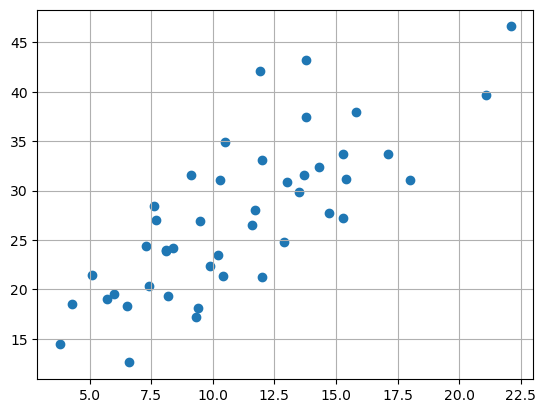

In [2]:
fonds = [ 6.5, 10.3,  7.7, 15.8,  7.4, 14.3, 15.4, 21.1, 22.1, 12.0,
          9.5,  8.1,  8.4, 15.3,  4.3,  9.3,  5.7, 12.9,  5.1,  3.8,
         17.1,  8.2,  8.1, 11.7, 13.0, 15.3, 13.5, 10.5,  7.3, 13.8, 
         10.4, 10.2, 18.0, 13.8,  6.0, 11.9,  9.4, 13.7, 12.0, 11.6,
          9.1, 6.6, 7.6, 9.9, 14.7]
product = [18.3, 31.1, 27.0, 37.9, 20.3, 32.4, 31.2, 39.7, 46.6, 33.1,
           26.9, 24.0, 24.2, 33.7, 18.5, 17.2, 19.0, 24.8, 21.5, 14.5,
           33.7, 19.3, 23.9, 28.0, 30.9, 27.2, 29.9, 34.9, 24.4, 37.4,
           21.4, 23.5, 31.1, 43.2, 19.5, 42.1, 18.1, 31.6, 21.3, 26.5,
           31.6, 12.6, 28.4, 22.4, 27.7]
z = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
     2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

plt.scatter(fonds, product)
plt.grid()

In [3]:
train = []
for value in fonds:
    train.append([value])

model = LinearRegression()
model.fit(train, product)

print(f'product = {model.intercept_} + {model.coef_[0]}*fonds')

product_pred = model.predict(train)
mse = mean_squared_error(product, product_pred)
r2 = r2_score(product, product_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

product = 11.502116300725149 + 1.4343996116921514*fonds
Mean Squared Error (MSE): 23.96743341038674
R-squared: 0.5964118944519115


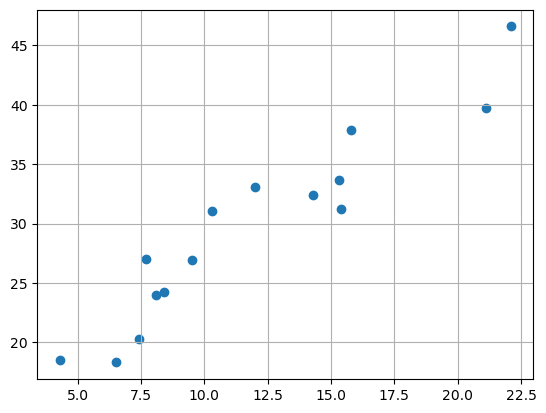

In [4]:
fonds_federal = fonds[:15]
product_federal = product[:15]

plt.scatter(fonds_federal, product_federal)
plt.grid()

In [5]:
train = []
for value in fonds_federal:
    train.append([value])

model = LinearRegression()
model.fit(train, product_federal)

print(f'product = {model.intercept_} + {model.coef_[0]}*fonds')

product_federal_pred = model.predict(train)
mse = mean_squared_error(product_federal, product_federal_pred)
r2 = r2_score(product_federal, product_federal_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

product = 12.510538948952924 + 1.4435573275292155*fonds
Mean Squared Error (MSE): 6.264539037099566
R-squared: 0.8971358076306343


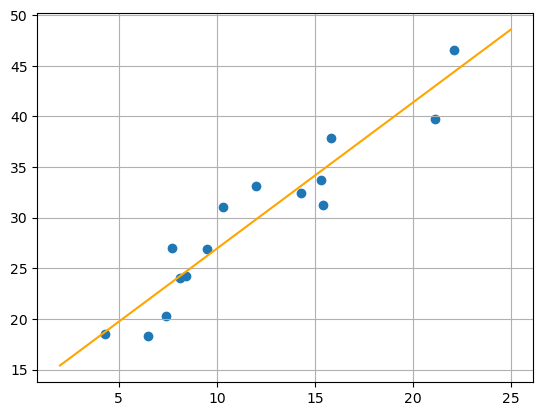

In [6]:
fonds_federal = fonds[:15]
product_federal = product[:15]

plt.scatter(fonds_federal, product_federal)
x = np.arange(2, 25, 0.01)
plt.plot(x, model.intercept_ + model.coef_[0]*x, c='orange')
plt.grid()

### 2. Множественная регрессия
Обобщением линейной регресионной модели с двумя переменными является многомерная регрессионная модель (или модель множественной регрессии). Пусть $n$ раз измерены значения факторов $x_1, x_2, ..., x_k$ и соответствующие значения переменной $y$; преполагается, что
$$
y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_k x_{ik} + \varepsilon_i, i=1,...,n,
$$
(второй индекc у $x$ относится к номеру фактора, а первый - к номеру наблюдения); предполагается также, что
$$
M\varepsilon_i = 0, M\varepsilon^2 = \sigma^2,\\
M(\varepsilon_i, \varepsilon_j) = 0, i \neq j,
$$
то есть $\varepsilon_i$ - некоррелированные случайные величины. Соотношения удобно записывать в матричной форме:
$$
Y = X\beta + \varepsilon,
$$
где $Y = (y_1, ..., y_k)^T$ - вектор-столбец значений зависимой переменной, $\beta = (\beta_0, ..., \beta_k)^T$ - вектор-столбец независимых коэффициентов регрессии, $\varepsilon = (\varepsilon_1, ..., \varepsilon_n)^T$ - вектор случайных отклонений, $X$ - матрица $n \cdot (k+1)$; в $i-ой$ строке $(1, x_{i1}, ...,  x_{ik})$ Находятся значения независимых переменных в $i-ом$ наблюдении, первая переменная - константа, равная 1.  
**Оценка коэффициентов регрессии.** Построим оценку $\beta^{\text{^}}$ для вектора $\beta$ так, чтобы вектор оценок $Y^{\text{^}} = X\beta^{\text{^}}$ зависимой переменной минимально (в смысле квалрата нормы разности) отличался от вектора $Y$ заданных значений:
$$
\| Y - Y^{\text{^}} \|^2 = \| Y - X\beta^{\text{^}} \|^2 \rightarrow min \text{ по } \beta^{\text{^}}.
$$
Решением является (если раг матрицы $X$ равен $k+1$) оценка
$$
\beta^{\text{^}} = (X^TX)^{-1}X^TY.
$$
Нетрудно проверить, что она несмещенная. Ковариационная (дисперсионная) матрица равна
$$
D\beta^{\text{^}} = (\beta^{\text{^}} - \beta)(\beta^{\text{^}} - \beta)^T = \sigma^2(X^TX)^{-1} = \sigma^2Z,
$$
где обозначено $Z = (X^TX)^{-1}$. Справедлива  
**Теорема Гаусса-Маркова.** В условиях
$$
M\varepsilon_i = 0, M\varepsilon^2 = \sigma^2,\\
M(\varepsilon_i, \varepsilon_j) = 0, i \neq j,
$$
оценка $\beta^{\text{^}} = (X^TX)^{-1}X^TY$ является наилучшей (в смысле минимума дисперсии) оценкой в классе линейных несмещенных оценок.  
Для множественной регрессии коэффициент детерминации $R^2$
$$
R^2 = {R_{ss}\over{T_{ss}}} = 1 - {E_{ss}\over{T_{ss}}} = 1 - {\| Y - Y^{\text{^}}\|^2\over{\| Y - \overline{Y} \|^2}}
$$
Однако, значение $R^2$ возрастает с ростом числа переменных (регрессоров) в регрессии, что не означает улучшения качества предсказания, и потому вводится скорректированный (adjusted) коэффициент детерминации
$$
R_{adj}^2 = 1 - {\| Y - Y^{\text{^}} \| / (n - k - 1) \over{\| Y - \overline{Y} \| / (n-1)}} = 1 - (1-R^2) {n-1\over{n-k-1}}
$$
Его использование более корректно для сравнения регрессии при изменении числа переменных (регрессоров).

**Пример.** Исследуется зависимость урожайности y зерновых культур (ц/га) от ряда факторов (переменных) сельскохозяйственного производства, а именно,
1. х1 - число тракторов на 100 га;
2. х2 - число зерноуборочных комбайнов на 100 га;
3. х3 - число орудий поверхностной обработки почвы на 100 га;
4. х4 - количество удобрений, расходуемых на гектар (т/га);
5. х5 - количество на гектар (ц/га) химических средств защиты растений.
Исходные данные для 20 районов области приведены ниже.  
Здесь мы располагаем выборкой объема n = 20; число независимых переменных (факторов) k = 5. Матрица Х должна содержать 6 столбцов размерности 20; первый столбец состоит из единиц, а столбцы со 2-го по 6-й представлены соответственно столбцами 3-7 таблицы. Специальный анализ (здесь не приводимый) технологии сбора исходных данных показал, что допущения могут быть приняты в качестве рабочей гипотезы поэтому можем записать уравнения статистической связи между $y_i$ и $X_i = (x_{i1}, x_{i2}, ..., x_{i5}),  i = 1, ..., n$ в виде $y_i = \beta_0 + \beta_1x_{i1} + ... + \beta_kx_{ik} + \varepsilon$.

In [7]:
x1 = np.array([1.59, 0.34, 2.53, 4.63, 2.16, 2.16, 0.68, 0.35, 0.52, 3.42, 
               1.78, 2.40, 9.36, 1.72, 0.59, 0.28, 1.64, 0.09, 0.08, 1.36])
x2 = np.array([0.26, 0.28, 0.31, 0.40, 0.26, 0.30, 0.29, 0.26, 0.24, 0.31,
               0.30, 0.32, 0.40, 0.28, 0.29, 0.26, 0.29, 0.22, 0.25, 0.26])
x3 = np.array([2.05, 0.46, 2.46, 6.44, 2.16, 2.69, 0.73, 0.42, 0.49, 3.02,
               3.19, 3.30, 11.51, 2.26, 0.60, 0.30, 1.44, 0.05, 0.03, 0.17])
x4 = np.array([0.32, 0.59, 0.30, 0.43, 0.39, 0.32, 0.42, 0.21, 0.20, 1.37,
               0.73, 0.25, 0.39, 0.82, 0.13, 0.09, 0.20, 0.43, 0.73, 0.99])
x5 = np.array([0.14, 0.66, 0.31, 0.59, 0.16, 0.17, 0.23, 0.08, 0.08, 0.73,
               0.17, 0.14, 0.38, 0.17, 0.35, 0.15, 0.08, 0.20, 0.20, 0.42])
y = np.array([9.7, 8.4, 9.0, 9.9, 9.6, 8.6, 12.5, 7.6, 6.9, 13.5,
              9.7, 10.7, 12.1, 9.7, 7.0, 7.2, 8.2, 8.4, 13.1, 8.7])
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'y': y})

In [8]:
X = np.array([x1, x2, x3, x4, x5]).T

model = LinearRegression()
model.fit(X, y)

print("Сдвиг (intercept):", model.intercept_)
print("Коэффициенты (веса):", model.coef_)
print(f'f(x) = {model.intercept_} + {model.coef_[0]}*x1 + {model.coef_[1]}*x2 +',
      f'{model.coef_[2]}*x3 + {model.coef_[3]}*x4 + {model.coef_[4]}*x5')

y_predicted = model.predict(X)
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Сдвиг (intercept): 3.5145951056766904
Коэффициенты (веса): [-6.13061938e-03  1.55424554e+01  1.09899373e-01  4.47457527e+00
 -2.93251090e+00]
f(x) = 3.5145951056766904 + -0.006130619378559074*x1 + 15.542455412566555*x2 + 0.10989937316205811*x3 + 4.474575266885396*x4 + -2.932510897965013*x5
Mean Squared Error (MSE): 1.7897755346959834
R-squared: 0.5173042417298361


In [9]:
df.corr()

,x1,x2,x3,x4,x5,y
x1,1.000000,0.854254,0.977908,0.110444,0.341013,0.430250
x2,0.854254,1.000000,0.881920,0.026852,0.459592,0.374079
x3,0.977908,0.881920,1.000000,0.029819,0.277923,0.403153
x4,0.110444,0.026852,0.029819,1.000000,0.570629,0.577310
x5,0.341013,0.459592,0.277923,0.570629,1.000000,0.332137
y,0.430250,0.374079,0.403153,0.577310,0.332137,1.000000


### 3. Нелинейная зависимость
Связь между признаком $x$ и $y$ может быть нелинейной, например, в виде полинома:
$$
y = P_k(x) + \varepsilon,
$$
где $P_k(x) = \beta_0 + \beta_1 x + ... + \beta_k x^k$, $k$ - степень полинома, $\varepsilon$ - случайная составляющая, $M\varepsilon = 0, D\varepsilon = \sigma^2$.  
Для имеющихся данных $(x_i, y_j), i = 1,..., n$, можно записать
$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + ... + \beta_k x_i^k + \varepsilon_i, i=1,..., n
$$
или в матричной форме: $Y = X\beta + \varepsilon$.

**Пример.** Имеются эмпирические данные о зависимости $y$ - выработки на одного работника доменного производства от $x$ - температуры дутья; данные приведены в таблице в условных единицах.

In [10]:
X = np.array([1.01, 1.15, 1.91, 2.47, 2.66, 2.74, 2.93, 4.04, 4.50, 4.64,
              5.80, 6.14, 6.64, 6.85, 8.11, 8.47, 9.09, 9.23, 9.59, 9.96])
y = np.array([8.8, 9.2, 8.7, 10.2, 9.3, 9.4, 10.7, 8.5, 8.9, 8.0,
              11.8, 12.2, 13.1, 14.4, 17.5, 18.6, 18.6, 18.0, 23.8, 18.4])
df = pd.DataFrame({'X': X, 'Y': y})
df

,X,Y
0,1.01,8.8
1,1.15,9.2
2,1.91,8.7
3,2.47,10.2
4,2.66,9.3
5,2.74,9.4
6,2.93,10.7
7,4.04,8.5
8,4.50,8.9
9,4.64,8.0


In [11]:
df['x^2'] = df.X * df.X
df['x^3'] = df.X * df.X * df.X
df

,X,Y,x^2,x^3
0,1.01,8.8,1.0201,1.030301
1,1.15,9.2,1.3225,1.520875
2,1.91,8.7,3.6481,6.967871
3,2.47,10.2,6.1009,15.069223
4,2.66,9.3,7.0756,18.821096
5,2.74,9.4,7.5076,20.570824
6,2.93,10.7,8.5849,25.153757
7,4.04,8.5,16.3216,65.939264
8,4.50,8.9,20.2500,91.125000
9,4.64,8.0,21.5296,99.897344


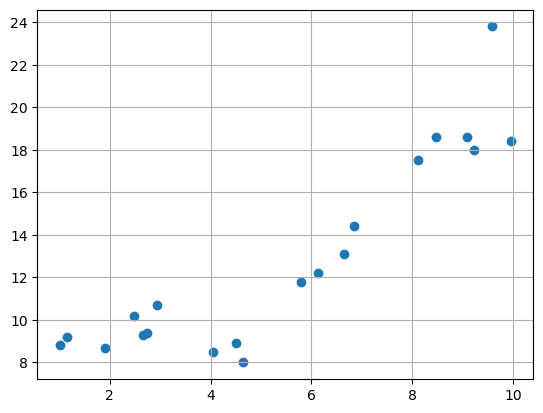

In [12]:
plt.scatter(df.X, df.Y)
plt.grid()

In [13]:
# Многочлен первой степени
x = []
for value in np.array(df['X']):
    x.append([value])

model = LinearRegression()
model.fit(x, y)

print("Сдвиг (intercept):", model.intercept_)
print("Коэффициенты (веса):", model.coef_)

y_predicted = model.predict(x)
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Сдвиг (intercept): 5.372930350639862
Коэффициенты (веса): [1.39573235]
Mean Squared Error (MSE): 3.9660927887690356
R-squared: 0.8065554139795788


In [14]:
# Многочлен второй степени
x = []
for value in np.array(df[['X', 'x^2']]):
    x.append([value[0], value[1]])

model = LinearRegression()
model.fit(x, y)

print("Сдвиг (intercept):", model.intercept_)
print("Коэффициенты (веса):", model.coef_)

y_predicted = model.predict(x)
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Сдвиг (intercept): 9.95683888787108
Коэффициенты (веса): [-0.90441218  0.20815346]
Mean Squared Error (MSE): 2.0010427627055534
R-squared: 0.9023999413385188


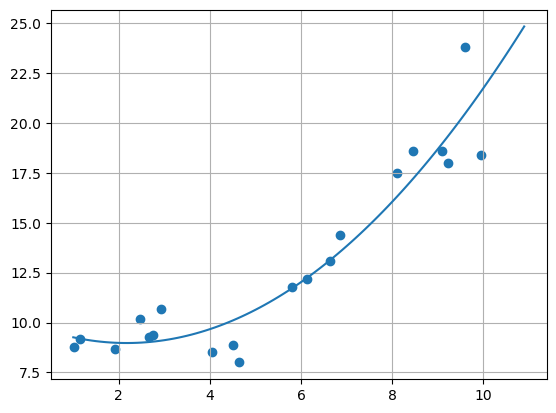

In [15]:
x_model = np.arange(1, 11, 0.1)
y_model = model.intercept_ + model.coef_[0]*x_model + model.coef_[1]*x_model*x_model
plt.scatter(df.X, df.Y)
plt.plot(x_model, y_model)
plt.grid()

In [16]:
# Многочлен третьей степени
x = []
for value in np.array(df[['X', 'x^2', 'x^3']]):
    x.append([value[0], value[1], value[2]])

model = LinearRegression()
model.fit(x, y)

print("Сдвиг (intercept):", model.intercept_)
print("Коэффициенты (веса):", model.coef_)

y_predicted = model.predict(x)
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Сдвиг (intercept): 11.606496362685728
Коэффициенты (веса): [-2.31980525  0.51623928 -0.01886609]
Mean Squared Error (MSE): 1.9129465554870637
R-squared: 0.906696798533491


In [17]:
# Многочлен второй степени без линейного члена
x = []
for value in np.array(df['x^2']):
    x.append([value])

model = LinearRegression()
model.fit(x, y)

print("Сдвиг (intercept):", model.intercept_)
print("Коэффициенты (веса):", model.coef_)

y_predicted = model.predict(x)
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Сдвиг (intercept): 8.02541177863432
Коэффициенты (веса): [0.12973897]
Mean Squared Error (MSE): 2.2921128776404416
R-squared: 0.8882031131538782


Наилучшим образом показывает зависимость многочлен второй степени.

### 4. Нелинейная зависимость (обобщение)
Предполагается, что связь между факторами $(x_1, ..., x_p)$ и $y$ выражается следующим образом:
$$
y = \beta_0 + \beta_1 \varphi_1(x_1, ..., x_p) + \beta_2 \varphi_2(x_1, ..., x_p) + ... + \beta_k \varphi_k(x_1, ..., x_p) + \varepsilon,
$$
где $\varphi_j(), j=1,...,k$ - система некоторых функций. Имеется $n$ наблюдений при различных значениях $x = (x_1, ..., x_p)$: $x^1, x^2, ..., x^n$; тогда
$$
y_i = \beta_0 + \sum\limits_{j=1}^k \beta_j \varphi_j(x^i) + \varepsilon_i, i = 1, ..., n,
$$
или в матричной форме
$$
Y = X\beta + \varepsilon
$$
**Пример.** Имеется 20 наблюдений по некоторому технологическому процессу химического производства; $x$, $y$ - изменяемое содержание двух веществ , $z$ - контролируемый параметр получаемого продукта. Полагая, что 
$$
z = P (x, y) + \varepsilon,
$$
где $P (x, y) =  \beta_0 +  \beta_1 x + \beta_2 y + \beta_3 x^2  + \beta_4 xy + \beta_5 y^2$  - многочлен второй степени, $\varepsilon$ - случайная составляющая,  $M\varepsilon = 0$,  $D\varepsilon = \sigma^2$, необходимо оценить функцию $P(x, y)$ и найти точку ее минимума. Исходные данные приведены в таблице.

In [18]:
x = np.array([-3, -3, -3, -2, -2, -2, -1, -1, 0, 0,
               0, 1, 1, 1, 2, 2, 2, 3, 3, 3])
y = np.array([-2, 1, 3, -3, 0, 2, -2, 3, -3, -1,
               2, -1, 1, 3, -3, 1, -3, -2, 0, 2])
z = np.array([68, 89.4, 148.5, 56.8, 18.5, 73, 29.2, 46, 46.2, 18.2,
               31.6, 8.6, 8.4, 1.9, 122.3, 8.1, 20.8, 105.2, 34, 7.5])
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df

,x,y,z
0,-3,-2,68.0
1,-3,1,89.4
2,-3,3,148.5
3,-2,-3,56.8
4,-2,0,18.5
5,-2,2,73.0
6,-1,-2,29.2
7,-1,3,46.0
8,0,-3,46.2
9,0,-1,18.2


In [19]:
df['x^2'] = df['x'] * df['x']
df['xy'] = df['x'] * df['y']
df['y^2'] = df['y'] * df['y']
df

,x,y,z,x^2,xy,y^2
0,-3,-2,68.0,9,6,4
1,-3,1,89.4,9,-3,1
2,-3,3,148.5,9,-9,9
3,-2,-3,56.8,4,6,9
4,-2,0,18.5,4,0,0
5,-2,2,73.0,4,-4,4
6,-1,-2,29.2,1,2,4
7,-1,3,46.0,1,-3,9
8,0,-3,46.2,0,0,9
9,0,-1,18.2,0,0,1


In [20]:
x = []
for value in np.array(df[['x', 'y', 'x^2', 'xy', 'y^2']]):
    x.append([value[0], value[1], value[2], value[3], value[4]])

model = LinearRegression()
model.fit(x, z)

print("Сдвиг (intercept):", model.intercept_)
print("Коэффициенты (веса):", model.coef_)
print(f'P(x, y) = {model.intercept_} + {model.coef_[0]}*x + {model.coef_[1]}*y + {model.coef_[2]}*x^2',
      f'+ {model.coef_[3]}*xy + {model.coef_[4]}*y^2')

y_predicted = model.predict(x)
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Сдвиг (intercept): 6.266102197687957
Коэффициенты (веса): [-6.74882226 -2.90506837  5.68510173 -5.03473624  3.10365612]
P(x, y) = 6.266102197687957 + -6.748822264500592*x + -2.9050683721263377*y + 5.685101733917739*x^2 + -5.034736244292308*xy + 3.10365611651966*y^2
Mean Squared Error (MSE): 3565.711747516974
R-squared: -775.8435179775541


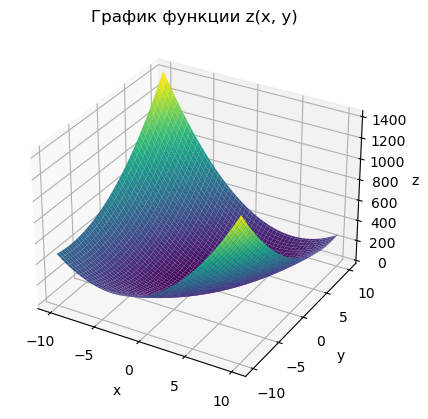

In [21]:
def z_func(x, y, inter, coef):
    return inter + coef[0]*x + coef[1]*y + coef[2]*np.power(x, 2) + coef[3]*x*y + coef[4]*np.power(y, 2)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z_func(x, y, model.intercept_, model.coef_), cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('График функции z(x, y)')

plt.show()

In [22]:
def z_minimize(x):
    return model.intercept_ + model.coef_[0]*x[0] + model.coef_[1]*x[1]\
                + model.coef_[2]*np.power(x[0], 2) + model.coef_[3]*x[0]*x[1]\
                + model.coef_[4]*np.power(x[1], 2)

result = minimize(z_minimize, [0, 0], method='Nelder-Mead')
print("Минимум найден в точке:", result.x)
print("Минимальное значение функции:", result.fun)

Минимум найден в точке: [1.24956775 1.48151424]
Минимальное значение функции: -0.10248066352979546
